In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

df = pd.concat([train.drop('price', axis = 1),test], axis = 0)

In [4]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'week', 'weekend', 'renovated_or_not', 'date_renovated_diff',
       'date_renovated_diff_log', 'date_built_diff', 'date_built_diff_log',
       'built_renovated_diff'],
      dtype='object')

# correlation

In [4]:
train.iloc[:,1:].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384,0.008012,-0.010352,-0.013625
bedrooms,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242,-0.002067,-0.007382,-0.012671
bathrooms,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120,-0.022161,0.007759,-0.010256
sqft_living,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176,-0.021638,0.009763,-0.011125
sqft_lot,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458,0.007243,-0.001897,0.003807
floors,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287,-0.020852,0.015441,-0.008965
waterfront,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255,-0.002041,0.005828,0.014694
view,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501,0.014233,-0.014440,0.013287
condition,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873,-0.045968,0.020182,-0.003907
grade,0.667211,0.375286,0.666278,0.762543,0.119906,0.462598,0.088061,0.247924,-0.143599,1.000000,0.759240,0.162657,0.440608,0.030155,-0.186541,0.112319,0.202130,0.715321,0.119734,-0.022660,0.009230,-0.019799


<Figure size 1440x1440 with 0 Axes>

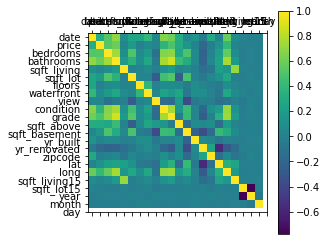

In [5]:
plt.figure(figsize = (20,20))
plt.matshow(train.iloc[:,1:].corr())
plt.xticks(range(len(train.columns)-1), train.iloc[:,1:].columns)
plt.yticks(range(len(train.columns)-1), train.iloc[:,1:].columns)
plt.colorbar()
plt.show()

In [6]:
corr = train.iloc[:,1:].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1,0.323672,0.525479,0.702899,0.0967927,0.262588,0.265738,0.400806,0.0397398,0.667211,0.608577,0.322218,0.0472903,0.140808,-0.0514984,0.301604,0.0235465,0.586419,0.0863843,0.00801202,-0.0103516,-0.0136253
bedrooms,0.323672,1,0.530548,0.596974,0.0334746,0.189532,-0.00481904,0.0857027,0.0348854,0.375286,0.494867,0.315183,0.158799,0.0227289,-0.162081,-0.0111896,0.135802,0.407394,0.0272419,-0.00206669,-0.00738206,-0.0126713
bathrooms,0.525479,0.530548,1,0.755853,0.0893075,0.508649,0.0754524,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.0654226,-0.2075,0.0181103,0.227669,0.573541,0.0881197,-0.0221606,0.00775864,-0.0102563
sqft_living,0.702899,0.596974,0.755853,1,0.1765,0.363193,0.108137,0.282821,-0.0542132,0.762543,0.878736,0.434017,0.315927,0.0648934,-0.200745,0.0516087,0.245429,0.760271,0.184176,-0.0216383,0.00976339,-0.0111248
sqft_lot,0.0967927,0.0334746,0.0893075,0.1765,1,0.00153453,0.0255838,0.080441,-0.00209894,0.119906,0.186242,0.0178184,0.058686,-0.00145131,-0.127709,-0.0822336,0.227451,0.147562,0.728458,0.00724319,-0.00189669,0.00380734
floors,0.262588,0.189532,0.508649,0.363193,0.00153453,1,0.0311591,0.0345113,-0.261016,0.462598,0.529476,-0.23935,0.490436,0.00975179,-0.0591071,0.0490044,0.126983,0.287125,-0.0102874,-0.0208518,0.0154412,-0.00896531
waterfront,0.265738,-0.00481904,0.0754524,0.108137,0.0255838,0.0311591,1,0.389669,0.0116129,0.0880613,0.0819683,0.0715759,-0.0265233,0.104168,0.0286323,-0.0147717,-0.0379216,0.0918099,0.0282548,-0.00204111,0.00582762,0.014694
view,0.400806,0.0857027,0.187488,0.282821,0.080441,0.0345113,0.389669,1,0.0452546,0.247924,0.172693,0.26588,-0.0616704,0.107605,0.0892468,0.00528468,-0.073151,0.278267,0.0765012,0.014233,-0.0144402,0.0132874
condition,0.0397398,0.0348854,-0.125907,-0.0542132,-0.00209894,-0.261016,0.0116129,0.0452546,1,-0.143599,-0.152856,0.175064,-0.36659,-0.0623424,0.00110616,-0.0159744,-0.110742,-0.0914069,-0.00387262,-0.0459685,0.020182,-0.00390739
grade,0.667211,0.375286,0.666278,0.762543,0.119906,0.462598,0.0880613,0.247924,-0.143599,1,0.75924,0.162657,0.440608,0.0301552,-0.186541,0.112319,0.20213,0.715321,0.119734,-0.0226604,0.00922962,-0.0197986


# date_type feature & target

## date
- 여기서 말한 날짜는 모두 구매한 날짜

In [7]:
print('전체 데이터 개수 : ', len(df),' / ', '구매한 날짜 유니크 수 : ', len(df.date.value_counts()))

전체 데이터 개수 :  21503  /  구매한 날짜 유니크 수 :  372


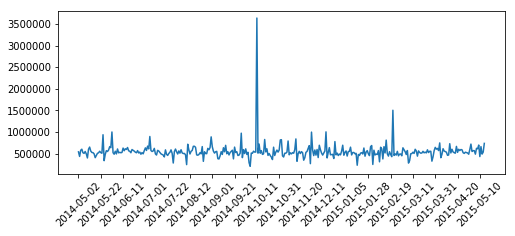

In [8]:
plt.figure(figsize = (8,3))
temp = pd.DataFrame(train.groupby('date')['price'].mean())
temp.reset_index(inplace=True)

plt.plot(temp.date, temp.price)
plt.xticks(temp[::20]['date'], fontsize=10, rotation=45)

plt.show()


In [9]:
temp.loc[temp.price==temp.price.max()]

,date,price
160,2014-10-11,3635000.0


In [10]:
print('train 데이터에서의 2014-10-11 거래 수 : ',sum(train.date == '2014-10-11'))
print('test 데이터에서의 2014-10-11 거래 수 : ',sum(test.date == '2014-10-11'))

train 데이터에서의 2014-10-11 거래 수 :  1
test 데이터에서의 2014-10-11 거래 수 :  1


- 거래 수가 각각 하루씩 존재
- tran 데이터에서 삭제하는 것도 고려해볼 것.

## month

Text(0.5, 0.98, 'Boxplot by year & month')

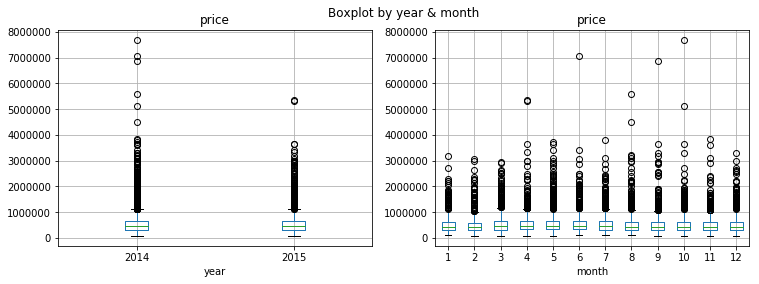

In [11]:
fig, ax = plt.subplots(figsize=(12,4), ncols = 2)
train.boxplot(column=['price'], by='year', ax=ax[0])
train.boxplot(column=['price'], by='month', ax=ax[1])

plt.suptitle('Boxplot by year & month')

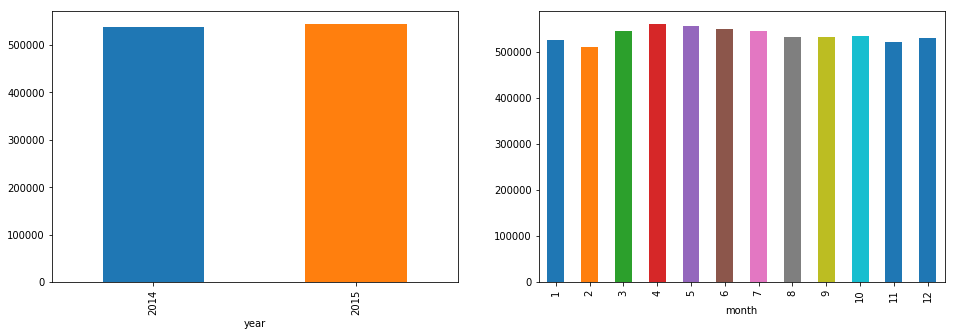

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
train.groupby(['year'])['price'].mean().plot.bar()
plt.subplot(1,2,2)
train.groupby(['month'])['price'].mean().plot.bar()

- 연도별, 월별로 확인했을 때는 뚜렷한 차이를 보이지 않는다.

## day

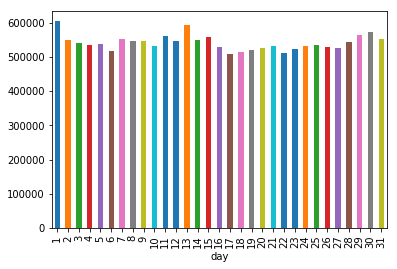

In [13]:
train.groupby(['day'])['price'].mean().plot.bar()

## week - 요일

In [15]:
def to_week(x) :
    year, month, day = (int(xx) for xx in x.split('-'))
    return datetime.date(year, month, day).strftime('%A')

In [16]:
#map 함수는 only for Series
train['week'] = train['date'].map(to_week)
test['week'] = test['date'].map(to_week)

In [17]:
train.week.value_counts()

Wednesday    3277
Tuesday      3260
Monday       2854
Thursday     2782
Friday       2527
Saturday      198
Sunday        137
Name: week, dtype: int64

In [18]:
test.week.value_counts()

Tuesday      1428
Wednesday    1296
Monday       1222
Thursday     1191
Friday       1150
Sunday         92
Saturday       89
Name: week, dtype: int64

- 거래 건수의 입장에서 보면, 주말을 제외하고는 비슷하다.

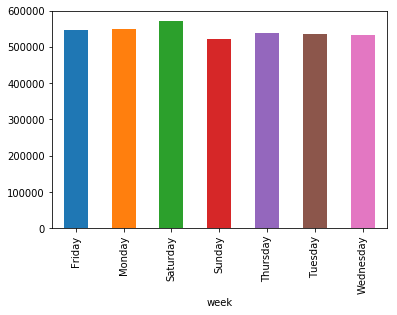

In [19]:
train.groupby(['week'])['price'].mean().plot.bar()

In [20]:
train['week'] = train['week'].map({'Sunday' : 0,'Monday' : 1, "Tuesday" : 2, "Wednesday" : 3,
                                     'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6})
test['week'] = test['week'].map({'Sunday' : 0,'Monday' : 1, "Tuesday" : 2, "Wednesday" : 3,
                                     'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6})

## weekend_or_not

In [21]:
#Saturday or Sunday -> 1
train['weekend'] = 0
train.loc[(train['week'] == 0) | (train['week'] == 6),'weekend'] = 1

test['weekend'] = 0
test.loc[(train['week'] == 0) | (test['week'] == 6),'weekend'] = 1

## yr_renovated
- 집을 재건축한 년도

In [22]:
#0보다 작은 값은 없다.
sum(train.yr_renovated<0)

0

- renovated_or_not : 재건축을 했으면 1 아니면 0

In [23]:
train['renovated_or_not'] = 0
train.loc[train.yr_renovated>0,'renovated_or_not'] = 1
test['renovated_or_not'] = 0
test.loc[test.yr_renovated>0,'renovated_or_not'] = 1

In [24]:
print('재건축 비율 : ', sum(train.renovated_or_not==1) / len(train))

재건축 비율 :  0.04196873960758231


In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

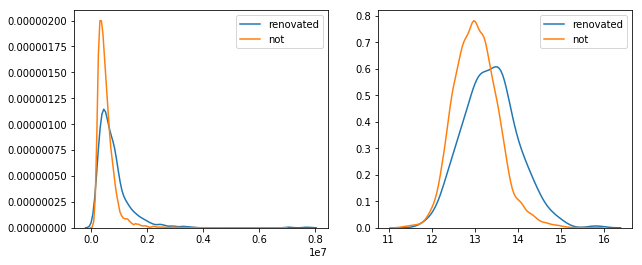

In [27]:
df1 = train[train.renovated_or_not == 1]
df2 = train[train.renovated_or_not == 0]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(df1['price'],label = 'renovated')
sns.kdeplot(df2['price'],label = 'not')

plt.subplot(1,2,2)
sns.kdeplot(np.log(df1['price']),label = 'renovated')
sns.kdeplot(np.log(df2['price']),label = 'not')

- date_renovated_diff : 구매년도 - 재건축날짜(재건축을 하지 않았을 시, 건축년도)

In [28]:
#다 짓기 전에 구매한 경우 있음.
train[train['year'] - train['yr_built'] <0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,week,weekend,renovated_or_not
1264,1264,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,6,25,3,0,0
1920,1920,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,47.5756,-122.316,1440,4800,2014,10,29,3,0,0
5303,5303,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,2014,12,31,3,0,0
5654,5654,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,2014,6,24,2,0,0
10110,10110,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,8,26,2,0,0
11890,11890,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,2014,6,17,2,0,0
14428,14428,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,2014,8,28,4,0,0
14484,14484,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,2014,7,9,3,0,0
14563,14563,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,47.5951,-122.301,1350,3000,2014,7,31,4,0,0
14776,14776,2014-11-25,559000.0,2,3.00,1650,960,3.0,0,0,3,8,1350,300,2015,0,98103,47.6611,-122.346,1650,3000,2014,11,25,2,0,0


In [29]:
#재건축 안 한 경우
train['date_renovated_diff'] = train['year'] - train['yr_built']
#재건축을 한 경우
ind = np.where(train['renovated_or_not'] == 1)
train.loc[ind]['date_renovated_diff'] = train.loc[ind]['year'] - train.loc[ind]['yr_renovated']

#재건축 안 한 경우
test['date_renovated_diff'] = test['year'] - test['yr_built']
#재건축을 한 경우
ind = np.where(test['renovated_or_not'] == 1)
test.loc[ind]['date_renovated_diff'] = test.loc[ind]['year'] - test.loc[ind]['yr_renovated']

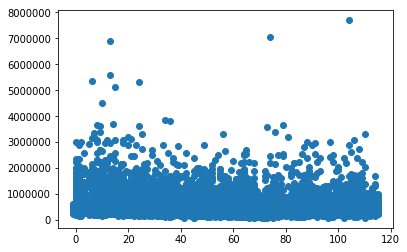

In [30]:
plt.scatter(train['date_renovated_diff'],train.price)

In [31]:
train['date_renovated_diff_log'] = np.log(train['date_renovated_diff']-train['date_renovated_diff'].min() + 0.00001)
test['date_renovated_diff_log'] = np.log(test['date_renovated_diff']-test['date_renovated_diff'].min() + 0.00001)

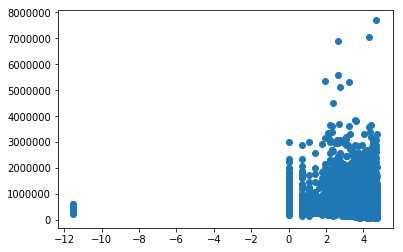

In [32]:
plt.scatter(train.date_renovated_diff_log,train.price)

## yr_built
- 지어진 년도

- date_built_diff : 구매년도 - 처음에 지어진 날짜

In [33]:
train['date_built_diff'] = train['year'] - train['yr_built']
test['date_built_diff'] = test['year'] - test['yr_built']

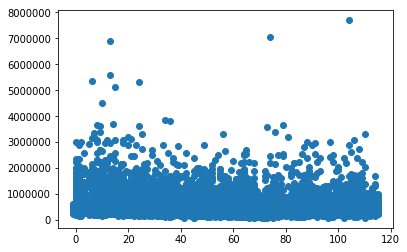

In [34]:
plt.scatter(train.date_built_diff,train.price)

In [35]:
train['date_built_diff_log'] = np.log(train['date_built_diff']-train['date_built_diff'].min() + 0.00001)
test['date_built_diff_log'] = np.log(test['date_built_diff']-test['date_built_diff'].min() + 0.00001)

- built_renovated_diff :지어진 날짜 - 재건축 날짜

In [36]:
train['built_renovated_diff'] = train['yr_built'] - train['yr_renovated']
test['built_renovated_diff'] = test['yr_built'] - test['yr_renovated']

In [38]:
#train.to_csv('../input/train.csv',index = False)
#test.to_csv('../input/test.csv',index = False)

# location features

In [39]:
train[['long','lat']].describe()

,long,lat
count,15035.000000,15035.000000
mean,-122.213677,47.560721
std,0.141294,0.138164
min,-122.519000,47.155900
25%,-122.328000,47.472700
50%,-122.231000,47.571900
75%,-122.126000,47.678300
max,-121.315000,47.777600


### histogram

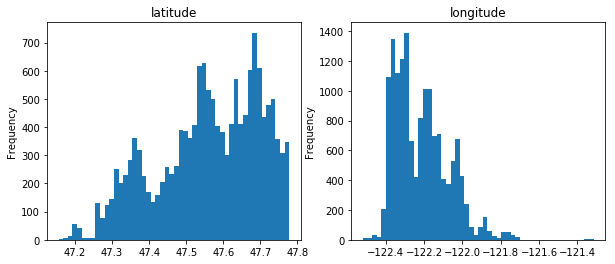

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('latitude')
train.lat.plot.hist(bins = 50)

plt.subplot(1,2,2)
plt.title('longitude')
train.long.plot.hist(bins = 50)

### with target

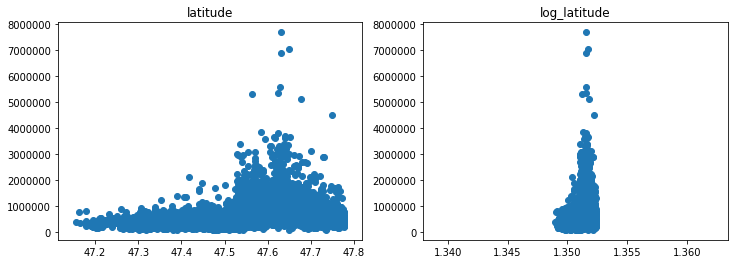

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('latitude')
plt.scatter(train.lat, train.price)

plt.subplot(1,2,2)
plt.title('log_latitude')
train['log_lat'] = np.log(train.lat)
plt.scatter(np.log(train.log_lat), train.price)

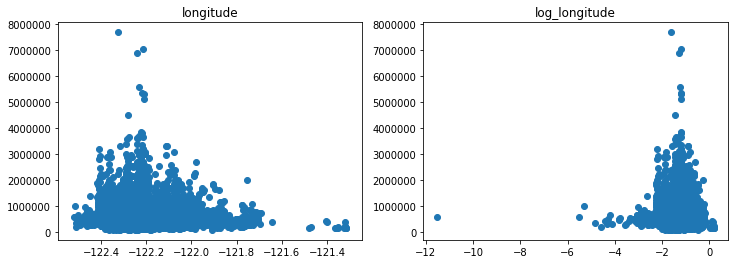

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('longitude')
plt.scatter(train.long, train.price)

plt.subplot(1,2,2)
plt.title('log_longitude')
train['log_long'] = np.log(train.long - train.long.min() + 0.00001)
plt.scatter(train.log_long, train.price)

In [8]:
test['log_lat'] = np.log(test.lat)
test['log_long'] = np.log(test.long - test.long.min() + 0.00001)

### clustering
- longitude, latitude, price
- 다시 생각해보자

In [57]:
from sklearn.cluster import KMeans

In [58]:
df_cluster = train[['long','lat','price']]

In [59]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    Sum_of_squared_distances.append(km.inertia_)

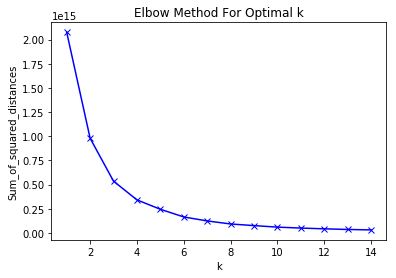

In [60]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
k=4
km = KMeans(n_clusters=4,algorithm='auto')
km.fit(df_cluster)
km_predict = pd.DataFrame(km.predict(df_cluster))
km_predict.columns=['km_4_result']

In [62]:
#predict 값들은 위치와 가격을 갖고 하우스별로 등급을 매긴 것.
#따라서 비슷한 위치에 있는 test data 넣어서 등급 넣어줄 것.
km_predict.km_4_result.value_counts()

2    9018
0    5035
1     850
3     132
Name: km_4_result, dtype: int64

In [72]:
train['km_4_result'] = km_predict['km_4_result']

### visualization on the map

In [77]:
houses_map = folium.Map(location = [train['lat'].mean(), train['long'].mean()], zoom_start = 10)
lat_long_data = train.loc[train.km_4_result == 3,['lat','long']].values.tolist()
h_cluster = folium.plugins.FastMarkerCluster(lat_long_data).add_to(houses_map)

houses_map

# Cateorical features & target

In [11]:
cat_var = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

In [166]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,week,weekend
0,0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,1,0
1,1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,2,0
2,2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,2,0
3,3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,3,0
4,4,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12,1,0


## plots with price

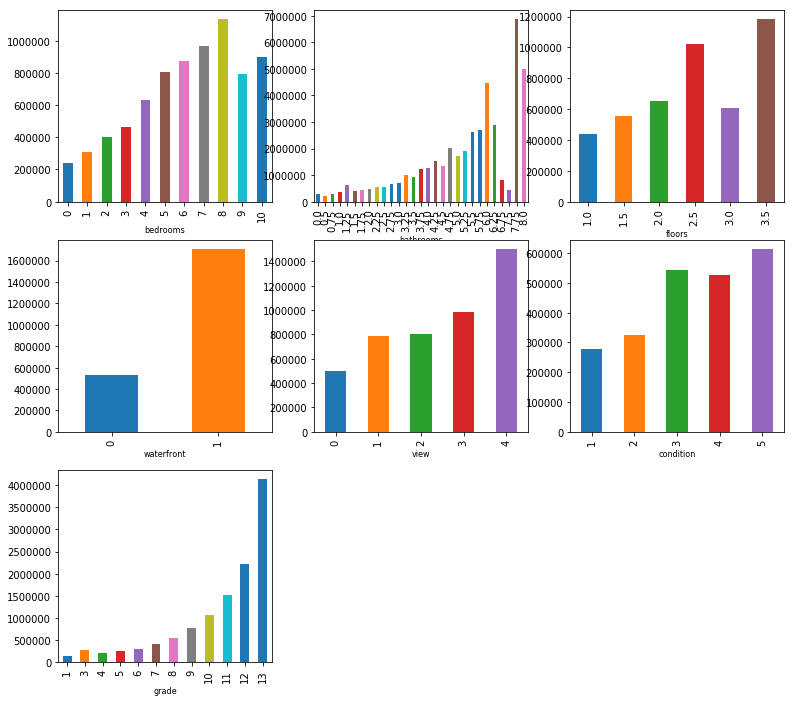

In [18]:
plt.figure(figsize = (13,12))
for i in range(len(cat_var)) :
    plt.subplot(3,3,i+1)
    train.groupby(cat_var[i])['price'].mean().plot.bar()
    plt.xlabel(cat_var[i],fontsize=8)
plt.show()

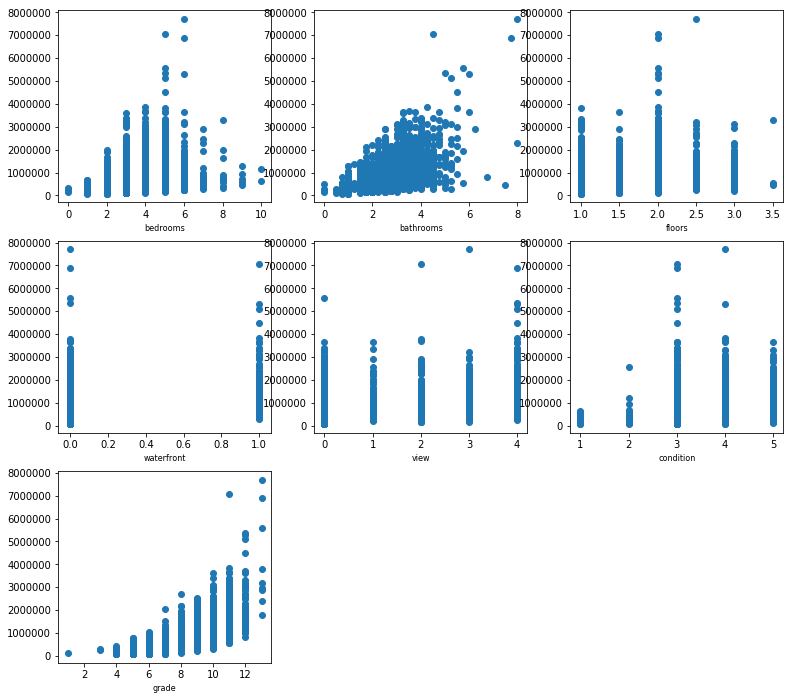

In [19]:
plt.figure(figsize = (13,12))
for i in range(len(cat_var)) :
    plt.subplot(3,3,i+1)
    plt.scatter(train[cat_var[i]], train.price)
    plt.xlabel(cat_var[i],fontsize=8)
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
for i in range(len(cat_var)) :
    plt.subplot(3,3,i+1)
    train.groupby(cat_var[i])['price'].mean().plot.bar()
plt.show()

In [12]:
len(cat_var)

7

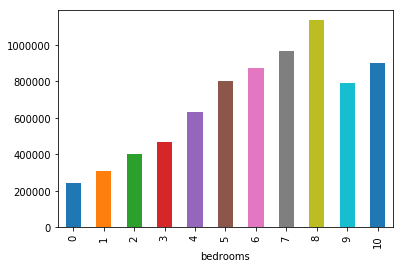

In [9]:
train.groupby('bedrooms')['price'].mean().plot.bar()

In [ ]:
plt.bar(train.bedrooms, train.price)

In [1]:
#train.to_csv('../input/train.csv',index = False)
#test.to_csv('../input/test.csv',index = False)

NameError: name 'train' is not defined

<BarContainer object of 15035 artists>

# Numerical features & target